In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm that identifies clusters of varying shapes and sizes in a dataset. Here are the main important points about DBSCAN:

Density-Based: DBSCAN groups together points that are closely packed, based on a density criterion, rather than assuming a specific number of clusters or relying on distance thresholds.

Core Points: A core point is a data point that has a minimum number of neighboring points (defined by a predefined radius) within its vicinity. These core points are the building blocks of clusters.

Border Points: Border points are not core points themselves but lie within the neighborhood of a core point. They are included in the clusters.

Noise Points: Noise points are data points that do not meet the criteria to be classified as either core or border points. They are considered outliers or noise.

Parameters: DBSCAN requires two parameters: epsilon (ε), which defines the radius of the neighborhood around a point, and minPts, which specifies the minimum number of points within this radius for a point to be considered a core point.

Cluster Formation: DBSCAN starts by selecting a random unvisited point and exploring its neighborhood. If the neighborhood contains enough points (minPts), a cluster is formed. The algorithm then expands the cluster by recursively adding neighboring core points and their border points.

Cluster Types: DBSCAN can discover clusters of arbitrary shapes and sizes. It can handle clusters that are dense, sparse, or irregularly shaped, making it robust to noise and outliers.

Noisy Data Handling: DBSCAN automatically identifies and disregards noise points, which are not assigned to any cluster. This makes it suitable for datasets with noisy or incomplete data.

Scalability: DBSCAN's time complexity is generally linear with respect to the number of data points, making it suitable for large datasets. However, its performance may degrade in high-dimensional spaces.

Applications: DBSCAN is widely used in various domains, including spatial data analysis, image processing, anomaly detection, and customer segmentation, due to its flexibility, robustness, and ability to handle complex data structures.

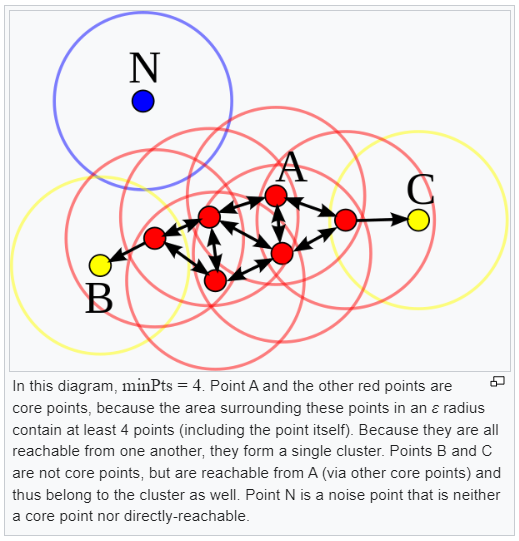

#### DBSCAN Code

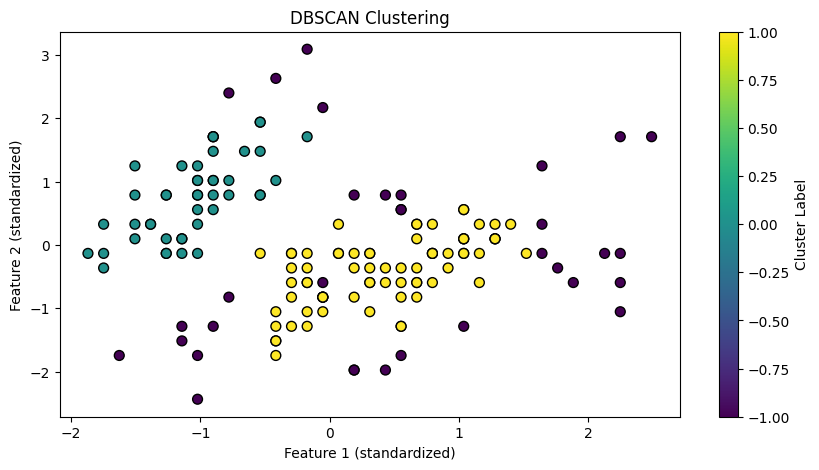

Silhouette Score: 0.36
Best Silhouette Score: 0.52
Best Parameters: {'eps': 0.7, 'min_samples': 5}


In [2]:
# Import Libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Load and prepare the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.colorbar(label='Cluster Label')
plt.show()

# Evaluate the clustering
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Hyperparameter Tuning (simple grid search for 'eps' and 'min_samples')
eps_values = [0.3, 0.4, 0.5, 0.6, 0.7]
min_samples_values = [3, 4, 5, 6]
best_score = -1
best_params = {'eps': None, 'min_samples': None}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_scaled)
        # Ensure we have more than 1 cluster and less than the number of samples (avoiding trivial solutions)
        if len(set(clusters)) > 1 and len(set(clusters)) < len(X_scaled):
            score = silhouette_score(X_scaled, clusters)
            if score > best_score:
                best_score = score
                best_params['eps'] = eps
                best_params['min_samples'] = min_samples

print(f'Best Silhouette Score: {best_score:.2f}')
print(f'Best Parameters: {best_params}')